In [357]:
# Importation des modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from IPython.display import clear_output
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [358]:
# Déclaration de variables

le = preprocessing.LabelEncoder()
model = KNeighborsClassifier(n_neighbors=3)

In [359]:
# Fonction de lecture du fichier csv

def read_csv(filename):
    try:
        global data_csv
        data_csv = pd.read_csv(filename, sep=",", engine='python')
        return data_csv
    except Exception as e:
        print(e)

In [360]:
# Lecture du fichier CSV Iris

iris = read_csv('iris.csv')
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [361]:
# Vérification de présence de valeur null

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

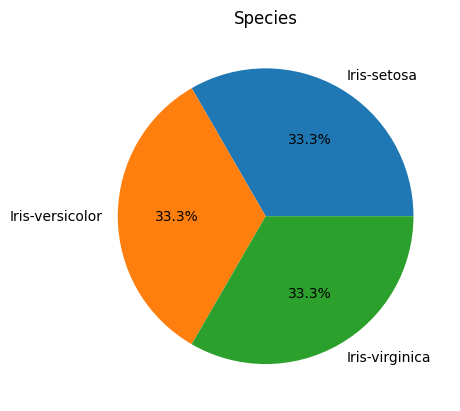

In [362]:
# Affiche la répartition des resultats présents dans le DataFrame pour les espèces

ax = iris['Species'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title('Species')
ax.set_ylabel('')
plt.show()

In [363]:
# Affiche la moyenne des longeurs des Sepal et Petal selon l'espèce

ir = iris.groupby('Species')['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'].mean()
clear_output()
print(ir)

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


In [364]:
# Affiche le tableau des mesures max et min des Sepal et Petal selon l'espèce

ir_min = iris.groupby('Species')['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'].min()
ir_max = iris.groupby('Species')['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'].max()
clear_output()
print("Min",ir_min,"\n")
print("Max",ir_max)

Min                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                4.3           2.3            1.0           0.1
Iris-versicolor            4.9           2.0            3.0           1.0
Iris-virginica             4.9           2.2            4.5           1.4 

Max                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                5.8           4.4            1.9           0.6
Iris-versicolor            7.0           3.4            5.1           1.8
Iris-virginica             7.9           3.8            6.9           2.5


In [365]:
# Fonction de graphique bar min et max

def hat_graph(ax, xlabels, values, group_labels, a):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(-spacing + x - spacing/2 + width * a, heights - heights0,
                    width, bottom=heights0, label=group_label, **style)             
        label_bars(heights, rects)



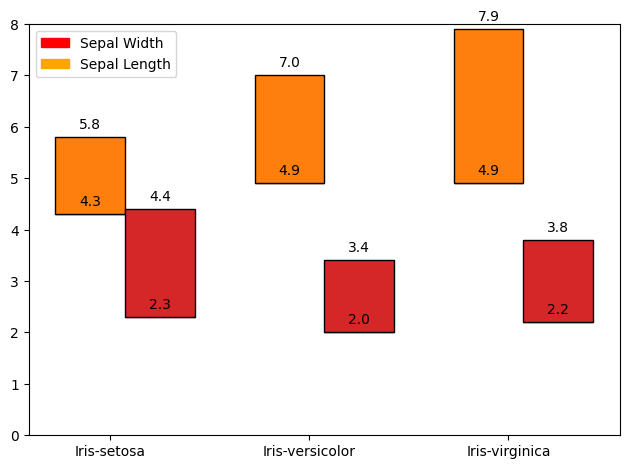

In [366]:
# Affiche le min et max de la largeur et longeur des Sepal

fig, ax = plt.subplots()
orange_patch = mpatches.Patch(color='orange', label='Sepal Length')
red_patch = mpatches.Patch(color='red', label='Sepal Width')
hat_graph(ax, iris['Species'].unique(), [ir_min['SepalLengthCm'].values, ir_max['SepalLengthCm'].values],  iris['Species'].unique(),1)
hat_graph(ax, iris['Species'].unique(), [ir_min['SepalWidthCm'].values, ir_max['SepalWidthCm'].values],  iris['Species'].unique(),2)
ax.set_ylim(0, 8)
ax.legend(handles=[red_patch, orange_patch])
fig.tight_layout()
plt.show()

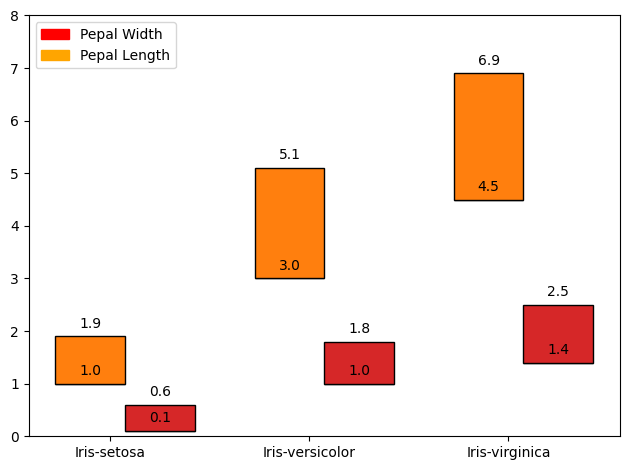

In [367]:
# Affiche le min et max de la largeur et longeur des Petal

fig, ax = plt.subplots()
orange_patch = mpatches.Patch(color='orange', label='Pepal Length')
red_patch = mpatches.Patch(color='red', label='Pepal Width')
hat_graph(ax, iris['Species'].unique(), [ir_min['PetalLengthCm'].values, ir_max['PetalLengthCm'].values],  iris['Species'].unique(),1)
hat_graph(ax, iris['Species'].unique(), [ir_min['PetalWidthCm'].values, ir_max['PetalWidthCm'].values],  iris['Species'].unique(),2)
ax.set_ylim(0, 8)
ax.legend(handles=[red_patch, orange_patch], loc='upper left')
fig.tight_layout()
plt.show()

In [368]:
# Convertion des valeurs "string" en "int" de la colonne Spicies

spicies_encoded=le.fit_transform(iris["Species"])

df_spicies_encoded = pd.DataFrame({'Species':np.array(spicies_encoded)})


# Création d'un DataFrame avec les valeurs de Species transformées

iris_encoded = iris

iris_encoded = iris_encoded.drop(['Species'], axis=1)

iris_encoded = iris_encoded.join(df_spicies_encoded) 

iris_encoded.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


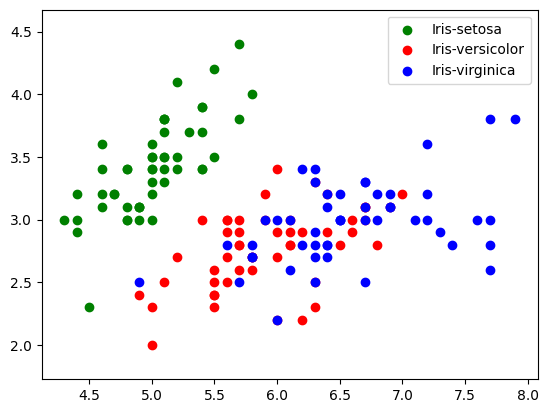

In [369]:
# Affiche les différents types d'Iris selon la largeur et longeur des sépales

x_sepal=iris_encoded.loc[:,"SepalLengthCm"]
y_sepal=iris_encoded.loc[:,"SepalWidthCm"]
specie=iris_encoded.loc[:,"Species"]
plt.axis('equal')
plt.scatter(x_sepal[specie == 0], y_sepal[specie == 0], color='g', label='Iris-setosa')
plt.scatter(x_sepal[specie == 1], y_sepal[specie == 1], color='r', label='Iris-versicolor')
plt.scatter(x_sepal[specie == 2], y_sepal[specie == 2], color='b', label='Iris-virginica')
plt.legend()
plt.show()

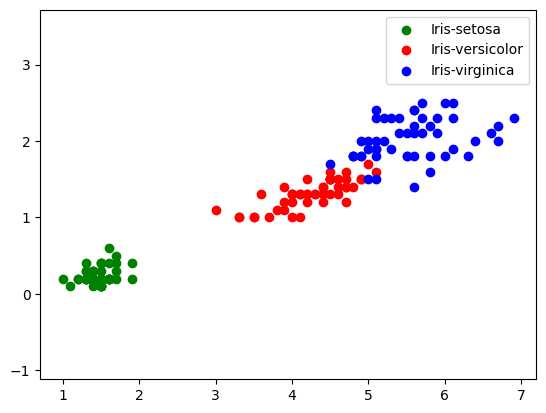

In [370]:
# Affiche les différents types d'Iris selon la largeur et longeur des pétales

x_petal=iris_encoded.loc[:,"PetalLengthCm"]
y_petal=iris_encoded.loc[:,"PetalWidthCm"]
specie=iris_encoded.loc[:,"Species"]
plt.axis('equal')
plt.scatter(x_petal[specie == 0], y_petal[specie == 0], color='g', label='Iris-setosa')
plt.scatter(x_petal[specie == 1], y_petal[specie == 1], color='r', label='Iris-versicolor')
plt.scatter(x_petal[specie == 2], y_petal[specie == 2], color='b', label='Iris-virginica')
plt.legend()
plt.show()

In [371]:
# Test de prédiction selon le pétal | [0]:Iris-setosa [1]:Iris-versicolor [2]:Iris-virginica

petal=list(zip(x_petal,y_petal))
model = KNeighborsClassifier(n_neighbors=3)
model.fit(petal,specie)
prediction= model.predict([[2.5,1]])
print(prediction)

[1]


In [372]:
# Test de prédiction selon le sépal | [0]:Iris-setosa [1]:Iris-versicolor [2]:Iris-virginica

sepal=list(zip(x_sepal,y_sepal))
model = KNeighborsClassifier(n_neighbors=3)
model.fit(sepal,specie)
prediction= model.predict([[5.5,3]])
print(prediction)

[1]


In [450]:
# Séparation valeurs et resultats

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = iris_encoded[feature_columns].values
y = iris_encoded['Species'].values

In [445]:
# Séparation du jeu de données en deux

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [446]:
# Test de prédiction selon le sépal | [0]:Iris-setosa [1]:Iris-versicolor [2]:Iris-virginica

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[2 1 1 0 2 1 0 2 0 0 1 2 2 2 2 1 2 1 2 0 1 0 1 0 1 1 0 2 1 1 0 1 2 2 1 2 0
 1]


In [447]:
# Affiche la matrice de confusion

confus_matrix = metrics.confusion_matrix(y_test, y_pred)
confus_matrix

array([[10,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 11]], dtype=int64)

In [448]:
# Affiche l’efficacité du modèle

accuracy = metrics.accuracy_score(y_test, y_pred)*100
accuracy

92.10526315789474

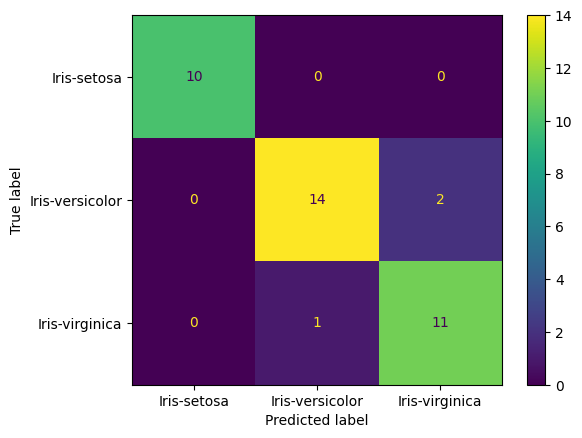

In [449]:
# Affiche la matrice de confusion
 
confus_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confus_matrix,  display_labels=iris['Species'].unique())
confus_matrix_display.plot()
plt.show()